# Student Performance Regression

### Dataset description

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary 
education or 4 â€“ higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary 
education or 4 â€“ higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' 
or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' 
or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

# Las siguientes calificaciones están relacionados con la materia
31 G1 - first period grade (numeric: from 0 to 20) 

31 G2 - second period grade (numeric: from 0 to 20) 

32 G3 - final grade (numeric: from 0 to 20, output target)


In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Loading dataset

In [53]:
ds = pd.read_csv('../dataset/student-mat.csv')

In [54]:
ds.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [55]:
dummy_ds = pd.get_dummies(ds)

In [56]:
dummy_ds.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [64]:
y = dummy_ds['G1']
X = dummy_ds.drop(columns=['G1','G2','G3'])

In [65]:
X.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,0.491139,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.500555,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


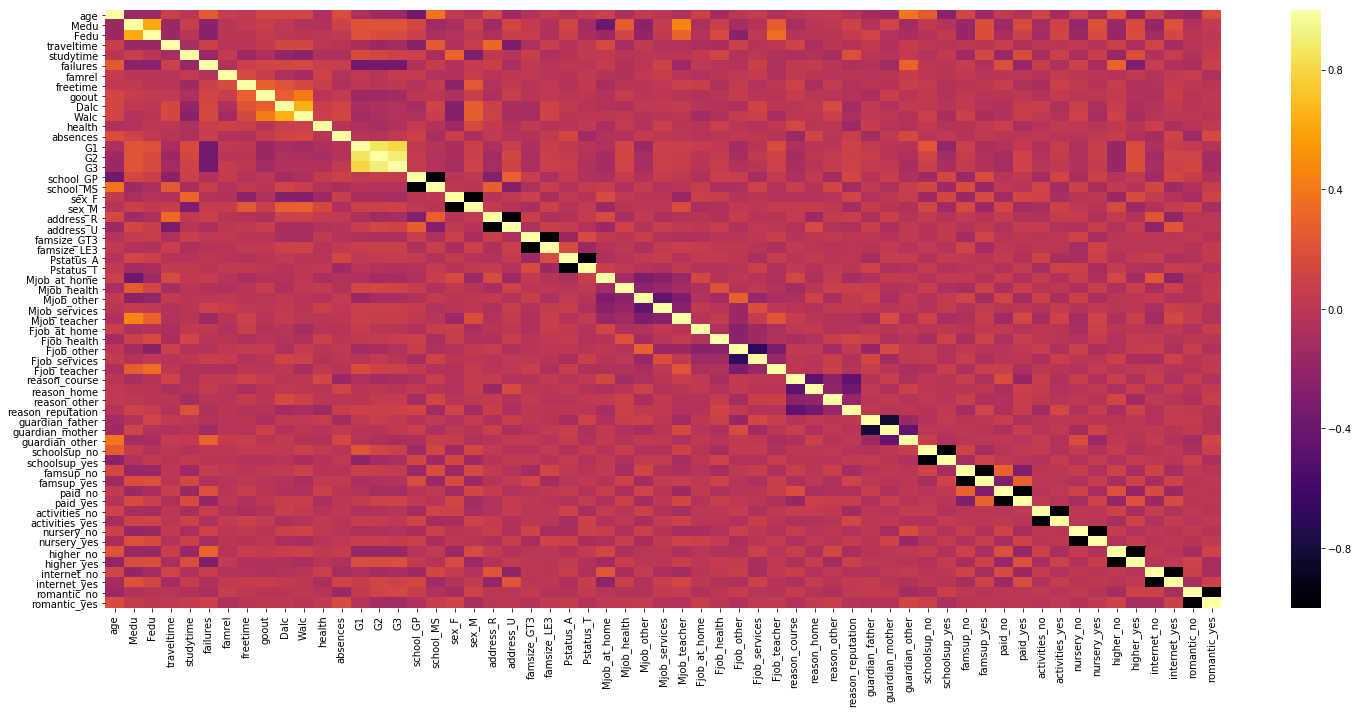

In [66]:
scaler = StandardScaler()
df_corr = pd.DataFrame(scaler.fit_transform(dummy_ds), columns = dummy_ds.columns)
corr = df_corr.corr()
plt.figure(figsize=(25,11))
sns.heatmap(corr, cmap = 'inferno')
plt.show()

In [125]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix,mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Lasso')
kf = KFold(n_splits=4)
indiceCol = ['alpha','tol','max_iter','MAE','MSE']
indiceReng = np.arange(32)
alphaValues = [0.1,1]
tolValues = [0.0001,0.001]
max_iterValues = [100,1000]
alphaA = []
tolA = []
max_iterA = []
maeError = []
mseError = []
d = []
i=0

for alpha in alphaValues:
    for tol in tolValues:
        for max_iter in max_iterValues:
            for train_index, test_index in kf.split(X.loc[:]):
                X_train = X.iloc[train_index] 
                X_test = X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]

                lasso = Lasso(alpha=alpha,tol=tol,max_iter=max_iter)
                lasso.fit(X_train, y_train)
                y_predLasso = lasso.predict(X_test)

                alphaA.append(alpha)
                tolA.append(tol)
                max_iterA.append(max_iter)
                maeError.append(mean_absolute_error(y_test, y_predLasso))
                mseError.append(mean_squared_error(y_test, y_predLasso))
        i = i + 1

d = {
    indiceCol[0]: pd.Series(alphaA, index = indiceReng),
    indiceCol[1]: pd.Series(tolA, index = indiceReng),
    indiceCol[2]: pd.Series(max_iterA, index = indiceReng),
    indiceCol[3]: pd.Series(maeError, index = indiceReng),
    indiceCol[4]: pd.Series(mseError, index = indiceReng),
}
pd.DataFrame(d, index=indiceReng, columns=indiceCol)



Lasso


,alpha,tol,max_iter,MAE,MSE
0,0.1,0.0001,100,2.444077,8.661122
1,0.1,0.0001,100,2.552108,9.274841
2,0.1,0.0001,100,2.577624,10.120876
3,0.1,0.0001,100,2.612334,10.098177
4,0.1,0.0001,1000,2.444077,8.661122
5,0.1,0.0001,1000,2.552108,9.274841
6,0.1,0.0001,1000,2.577624,10.120876
7,0.1,0.0001,1000,2.612334,10.098177
8,0.1,0.0010,100,2.444019,8.660672
9,0.1,0.0010,100,2.552108,9.274806


In [ ]:
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X.loc[:]):
    X_train = X.iloc[train_index] 
    X_test = X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ridge = Ridge(alpha=0.1)
    ridge.fit(X_train, y_train)
    y_predRidge = ridge.predict(X_test)
    
    print('Ridge')
    print('Mean absolute error: ' + str(mean_absolute_error(y_test, y_predRidge)))
    

In [9]:
X.iloc[[0,1]]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [10]:
X.as_matrix

<bound method NDFrame.as_matrix of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
6              1821     0          1.7         0   4       1          10   
7              1954     0          0.5         1   0       0          24   
8              1445     1          0.5         0   0       0          53   
9               509     1          0.6         1   2       1           9   
10              769     1          2.9         1   0       0           9   
11             1520     1          2.2         0   5 

In [15]:
clf = SVC(kernel = 'linear', C = 0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[124   1   0   0]
 [  3 125   0   0]
 [  0   7 119   0]
 [  0   0   3 118]]
Normalized confusion matrix
[[0.99 0.01 0.   0.  ]
 [0.02 0.98 0.   0.  ]
 [0.   0.06 0.94 0.  ]
 [0.   0.   0.02 0.98]]


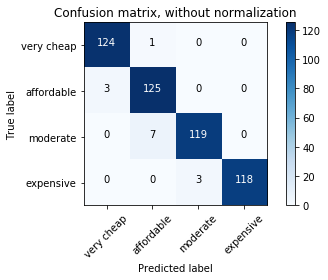

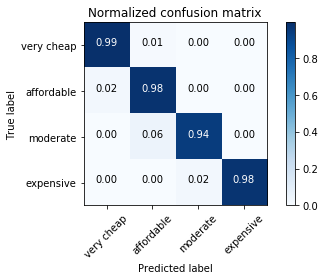

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['very cheap','affordable','moderate','expensive']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [14]:
accuracy_score(y_test, y_pred)

0.972